# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [3]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": 12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2022-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFEUR=X, CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 10468.37

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [4]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1629.203525,1405.115070,-229.284607,789.596675,938.395609,588.583206,1484.854143,23.019711,97.372513,219.371754,717.262177,1747.324329
2022-01-04,1619.735317,1365.095111,-236.608525,791.852592,980.756962,602.579480,1469.562795,23.069591,97.542206,214.806067,723.304163,1719.635911
2022-01-05,1573.010628,1338.897954,-240.794360,753.781242,960.603849,606.174242,1409.886915,22.446088,98.305859,201.973975,724.092213,1711.436991
2022-01-06,1548.744073,1319.233572,-241.675322,754.601397,972.059719,603.759832,1400.547564,22.396207,98.911938,206.439381,725.191596,1643.512411
2022-01-07,1557.051409,1335.918694,-240.814400,753.880462,985.982170,604.994955,1407.386333,22.171747,99.069523,200.491162,729.283120,1611.858596


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [6]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,279.966775,420.112953,140.146178
2022-01-05,272.472636,409.721432,137.248795
2022-01-06,269.518361,404.822587,135.304226
2022-01-07,269.949987,405.233632,135.283645
2022-01-10,267.574763,401.017311,133.442548


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [8]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.036822,0.032990,0.011712,0.037114,0.025344,0.013807,0.035246,0.004272,0.004098,0.055452,0.014256,0.023830
2022-01-05,0.036728,0.032919,0.011660,0.036918,0.025359,0.013914,0.035100,0.004321,0.004172,0.055105,0.014371,0.024120
2022-01-06,0.036791,0.032963,0.011678,0.037035,0.025455,0.013906,0.035187,0.004308,0.004148,0.055340,0.014362,0.023828
2022-01-07,0.036831,0.033139,0.011757,0.037060,0.025499,0.013891,0.035214,0.004316,0.004147,0.055379,0.014342,0.023606
2022-01-10,0.036906,0.032386,0.011514,0.037133,0.025558,0.013997,0.035258,0.004287,0.004129,0.055199,0.014473,0.023916


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [10]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,59.641385,45.035118,-2.771090,29.388893,24.855960,8.319846,51.795725,0.098550,0.399773,11.911440,10.311461,40.979713
2022-01-05,57.773361,44.074648,-2.807745,27.828122,24.359934,8.434509,49.486591,0.096993,0.410125,11.129837,10.406089,41.280173
2022-01-06,56.979365,43.485540,-2.822401,27.946907,24.743610,8.395791,49.281000,0.096485,0.410273,11.424315,10.415346,39.162130
2022-01-07,57.348214,44.271536,-2.831302,27.938823,25.141316,8.404013,49.559844,0.095693,0.410827,11.102987,10.459289,38.048749
2022-01-10,57.311623,40.590559,-2.825883,28.252619,25.153375,8.458304,49.520549,0.093106,0.412368,11.098118,10.530797,38.979229


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [12]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.213030,0.160859,-0.009898,0.104973,0.088782,0.029717,0.185007,0.000352,0.001428,0.042546,0.036831,0.146373
2022-01-05,0.212034,0.161758,-0.010305,0.102132,0.089403,0.030955,0.181620,0.000356,0.001505,0.040848,0.038191,0.151502
2022-01-06,0.211412,0.161345,-0.010472,0.103692,0.091807,0.031151,0.182848,0.000358,0.001522,0.042388,0.038644,0.145304
2022-01-07,0.212440,0.163999,-0.010488,0.103496,0.093133,0.031132,0.183589,0.000354,0.001522,0.041130,0.038745,0.140947
2022-01-10,0.214189,0.151698,-0.010561,0.105588,0.094005,0.031611,0.185072,0.000348,0.001541,0.041477,0.039356,0.145676


In [13]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [14]:
ivar_series.head()

Date
2022-01-04    329.904620
2022-01-05    329.186013
2022-01-06    329.627296
2022-01-07    331.393939
2022-01-10    323.859853
dtype: float64

## ES Test

In [15]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [16]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.042185,0.037796,0.013418,0.042520,0.029035,0.015818,0.040380,0.004894,0.004695,0.063529,0.016333,0.027302
2022-01-05,0.042078,0.037714,0.013359,0.042296,0.029053,0.015941,0.040212,0.004951,0.004780,0.063132,0.016465,0.027634
2022-01-06,0.042150,0.037764,0.013380,0.042430,0.029163,0.015931,0.040312,0.004936,0.004752,0.063401,0.016454,0.027299
2022-01-07,0.042196,0.037967,0.013470,0.042458,0.029213,0.015914,0.040344,0.004945,0.004751,0.063446,0.016431,0.027044
2022-01-10,0.042282,0.037103,0.013191,0.042542,0.029280,0.016035,0.040394,0.004912,0.004731,0.063239,0.016581,0.027400


In [17]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [18]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,68.329019,51.595137,-3.174740,33.669812,28.476591,9.531753,59.340524,0.112906,0.458006,13.646514,11.813475,46.949003
2022-01-05,66.188890,50.494760,-3.216734,31.881692,27.908312,9.663117,56.695032,0.111121,0.469865,12.751059,11.921887,47.293230
2022-01-06,65.279237,49.819840,-3.233525,32.017780,28.347876,9.618760,56.459493,0.110539,0.470035,13.088432,11.932493,44.866663
2022-01-07,65.701814,50.720328,-3.243723,32.008518,28.803513,9.628180,56.778954,0.109632,0.470670,12.720298,11.982836,43.591102
2022-01-10,65.659893,46.503163,-3.237514,32.368023,28.817329,9.690378,56.733937,0.106668,0.472435,12.714720,12.064761,44.657120


In [19]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [20]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.213030,0.160859,-0.009898,0.104973,0.088782,0.029717,0.185007,0.000352,0.001428,0.042546,0.036831,0.146373
2022-01-05,0.212034,0.161758,-0.010305,0.102132,0.089403,0.030955,0.181620,0.000356,0.001505,0.040848,0.038191,0.151502
2022-01-06,0.211412,0.161345,-0.010472,0.103692,0.091807,0.031151,0.182848,0.000358,0.001522,0.042388,0.038644,0.145304
2022-01-07,0.212440,0.163999,-0.010488,0.103496,0.093133,0.031132,0.183589,0.000354,0.001522,0.041130,0.038745,0.140947
2022-01-10,0.214189,0.151698,-0.010561,0.105588,0.094005,0.031611,0.185072,0.000348,0.001541,0.041477,0.039356,0.145676


In [21]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0] 

# Compute and display Incremental VaR
ies_series = pv.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [22]:
ies_series.head()

Date
2022-01-04    377.960018
2022-01-05    377.136735
2022-01-06    377.642298
2022-01-07    379.666278
2022-01-10    371.034743
dtype: float64

### Visualizations


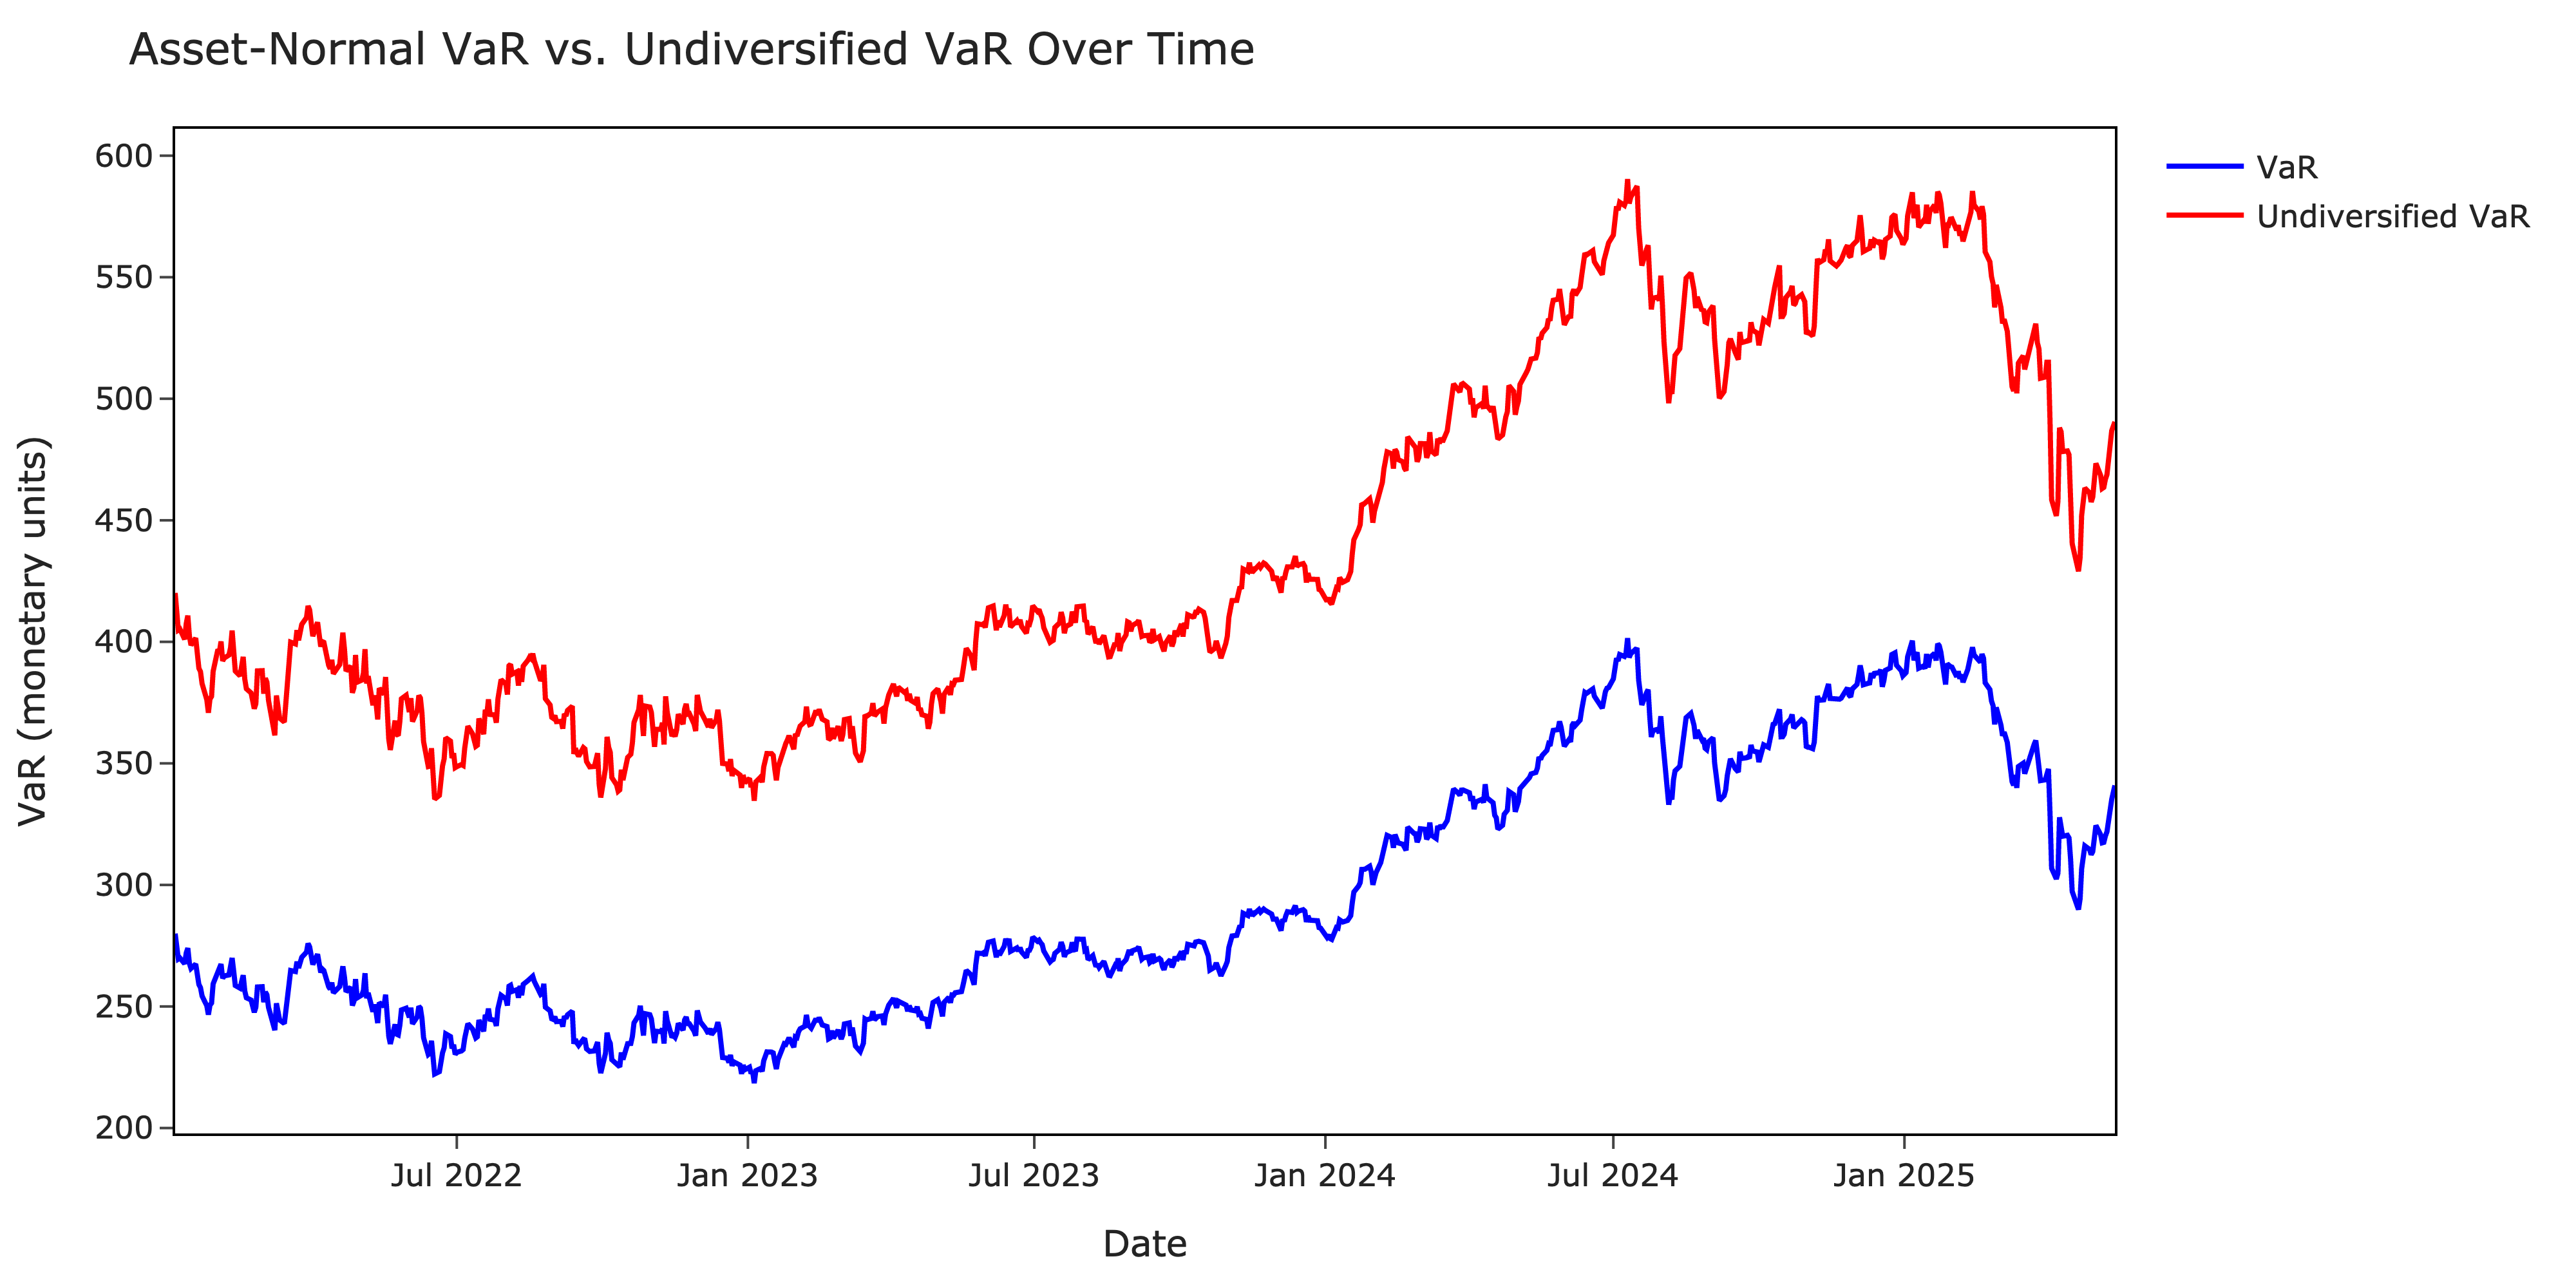

In [23]:
pl.plot_var_series(summary_df, interactive=False)


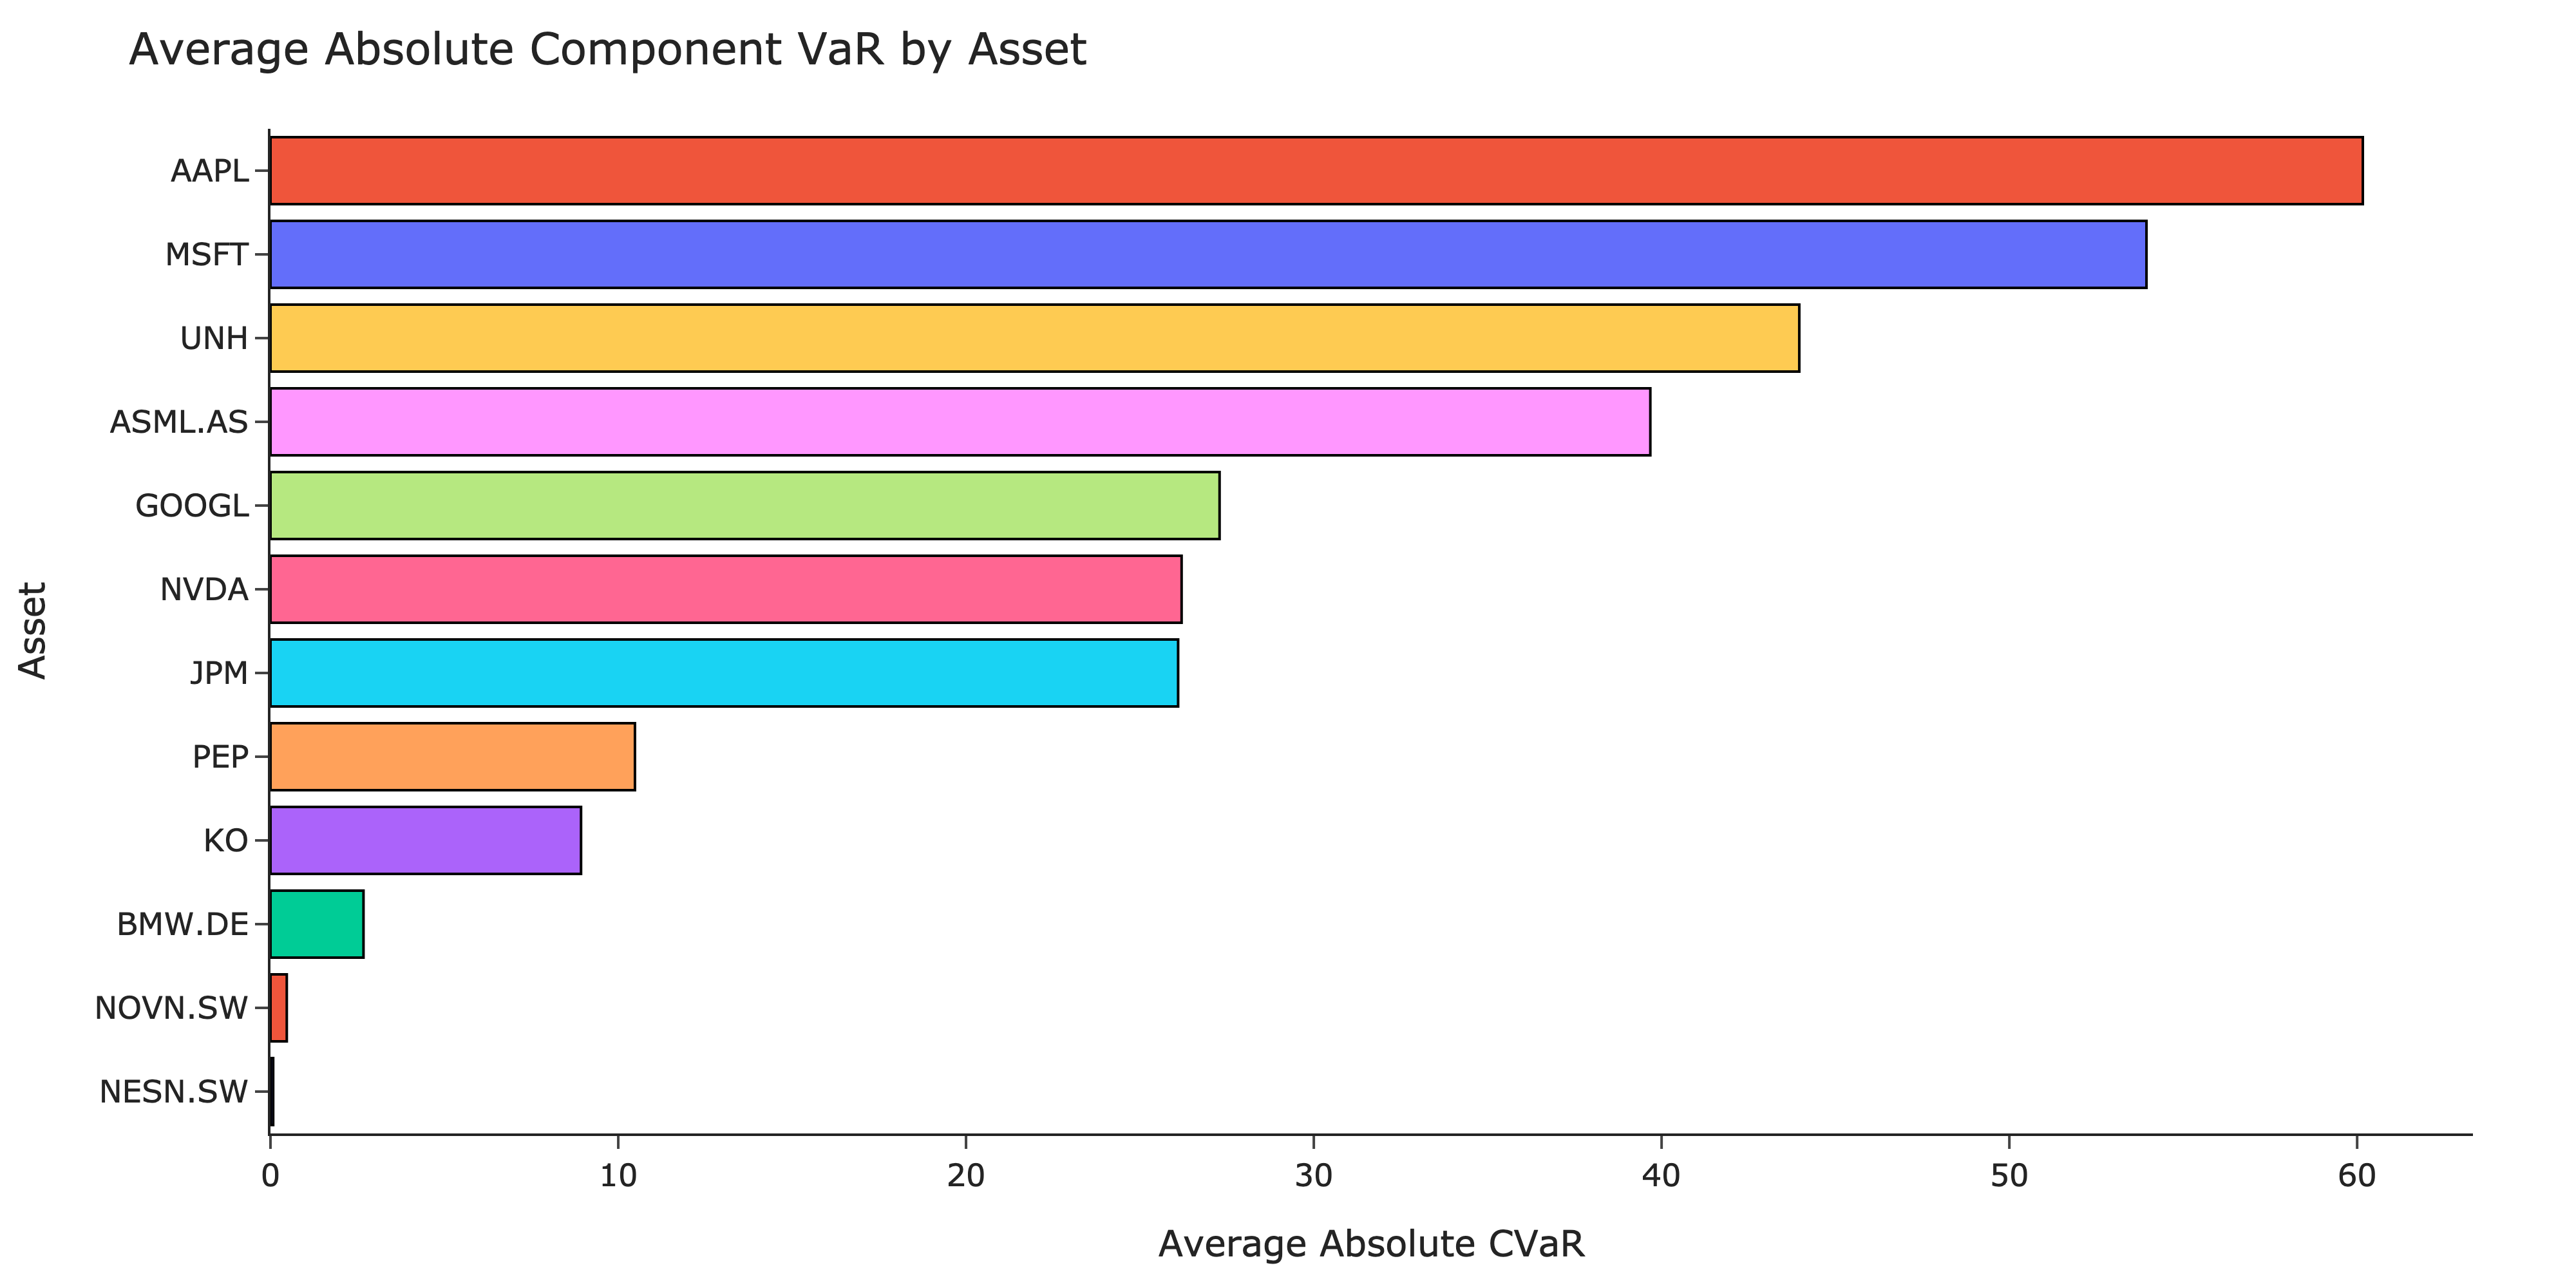

In [24]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


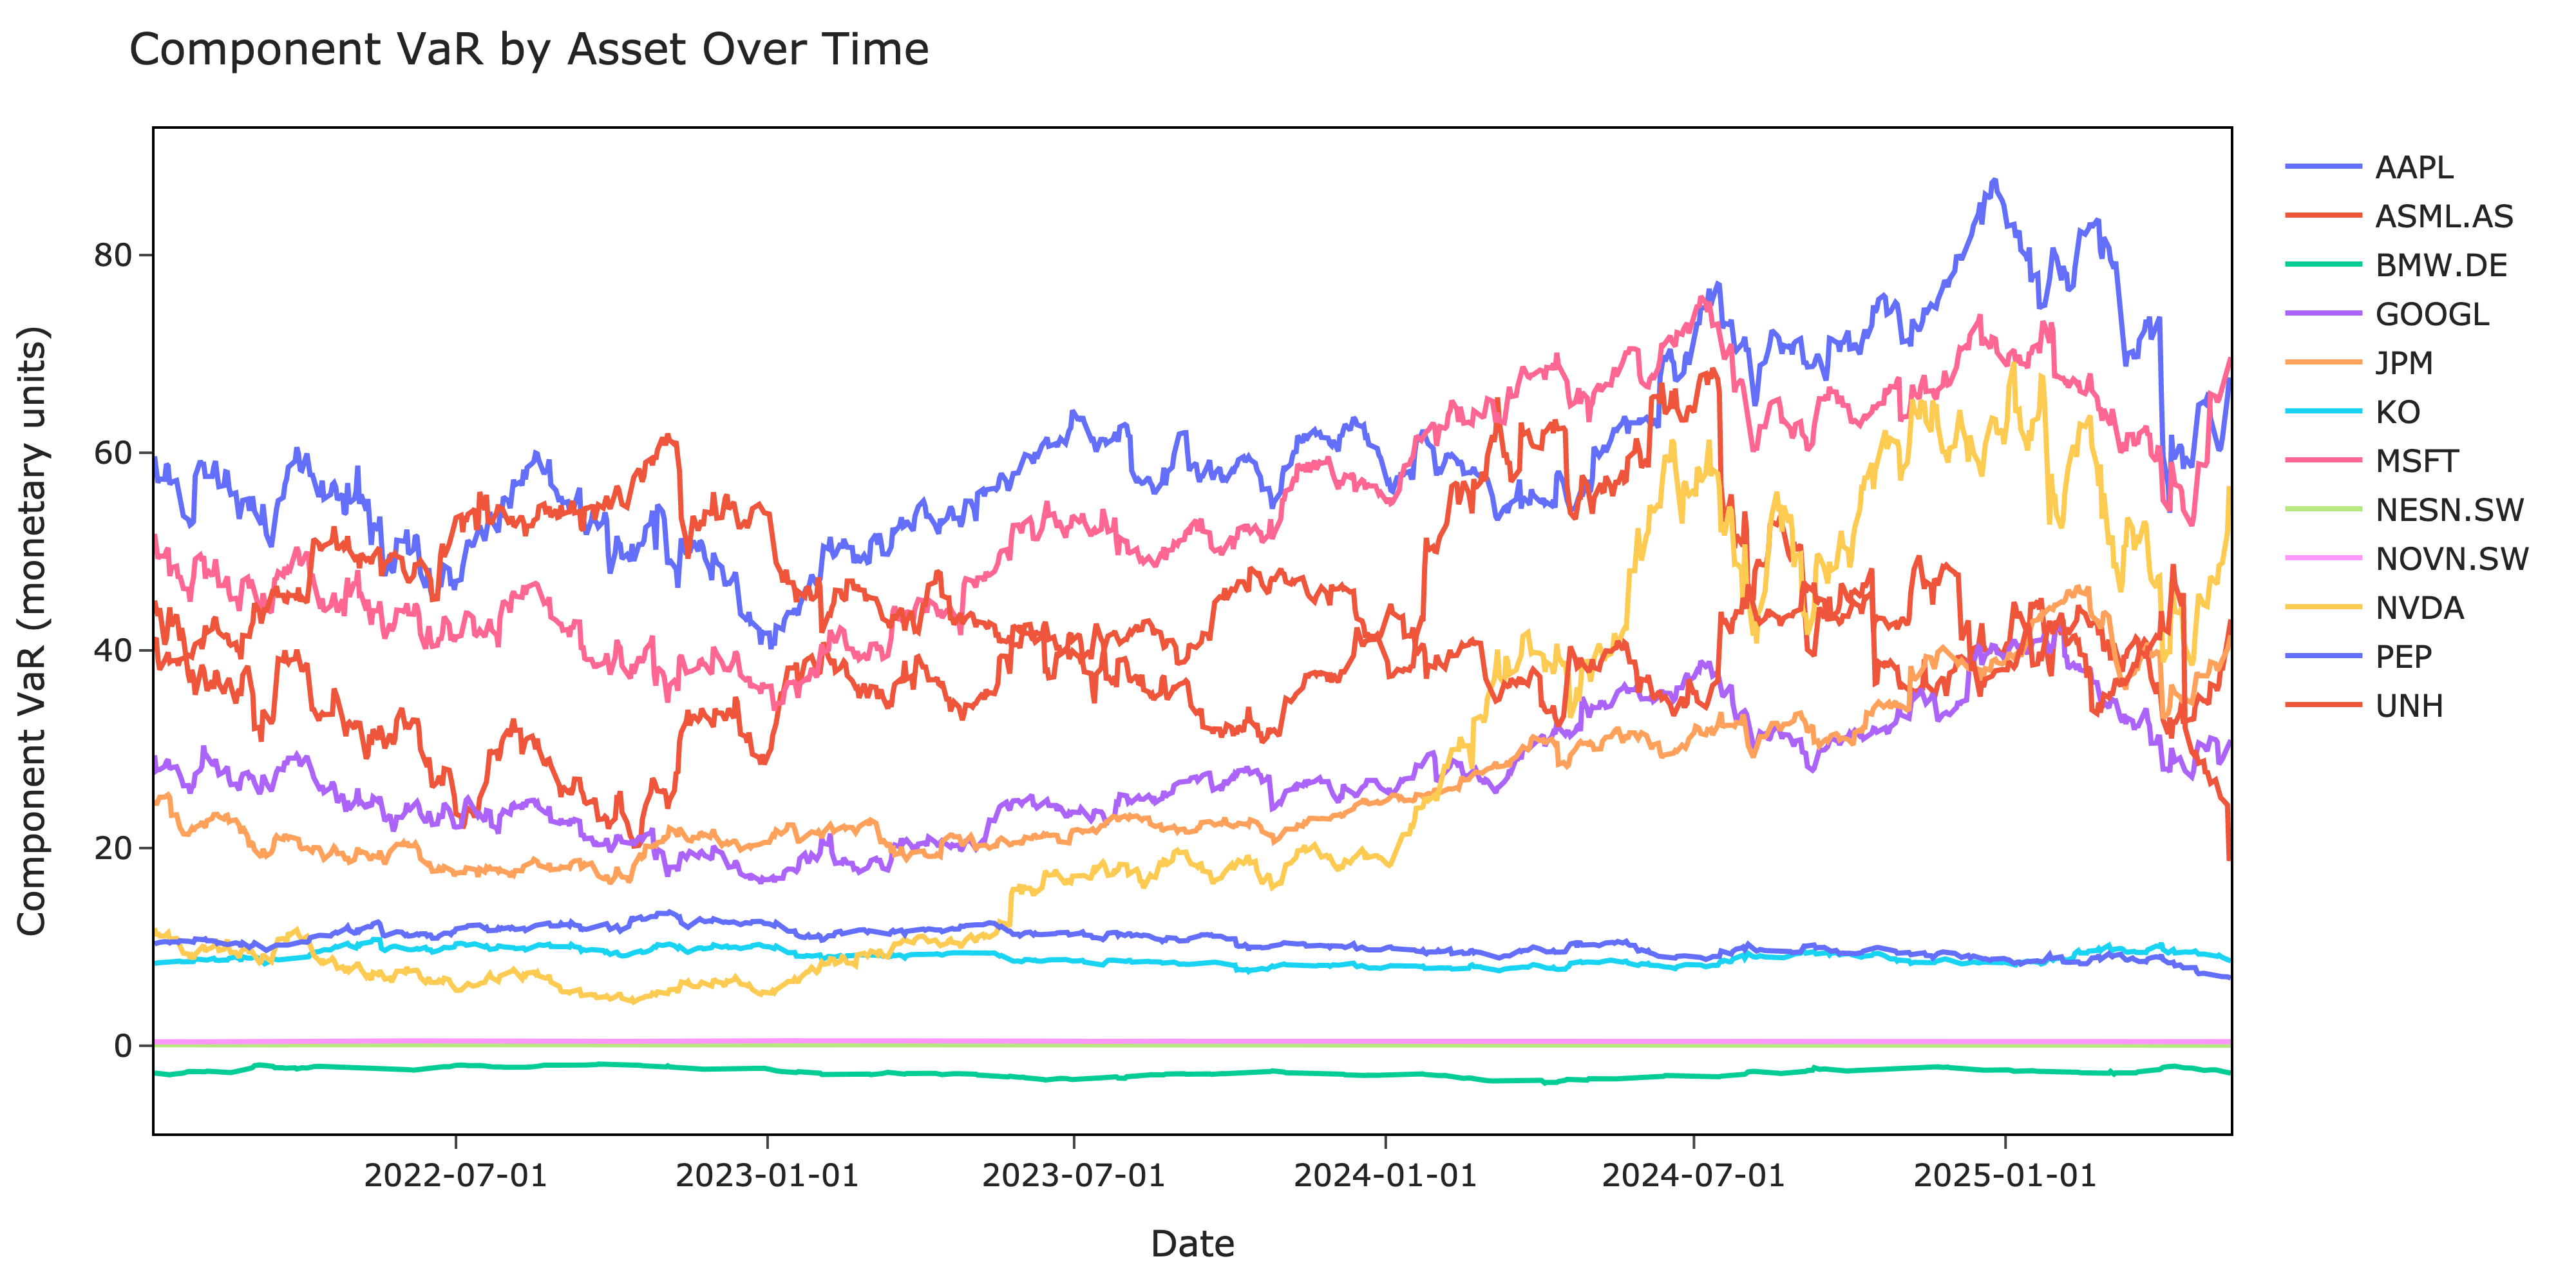

In [25]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


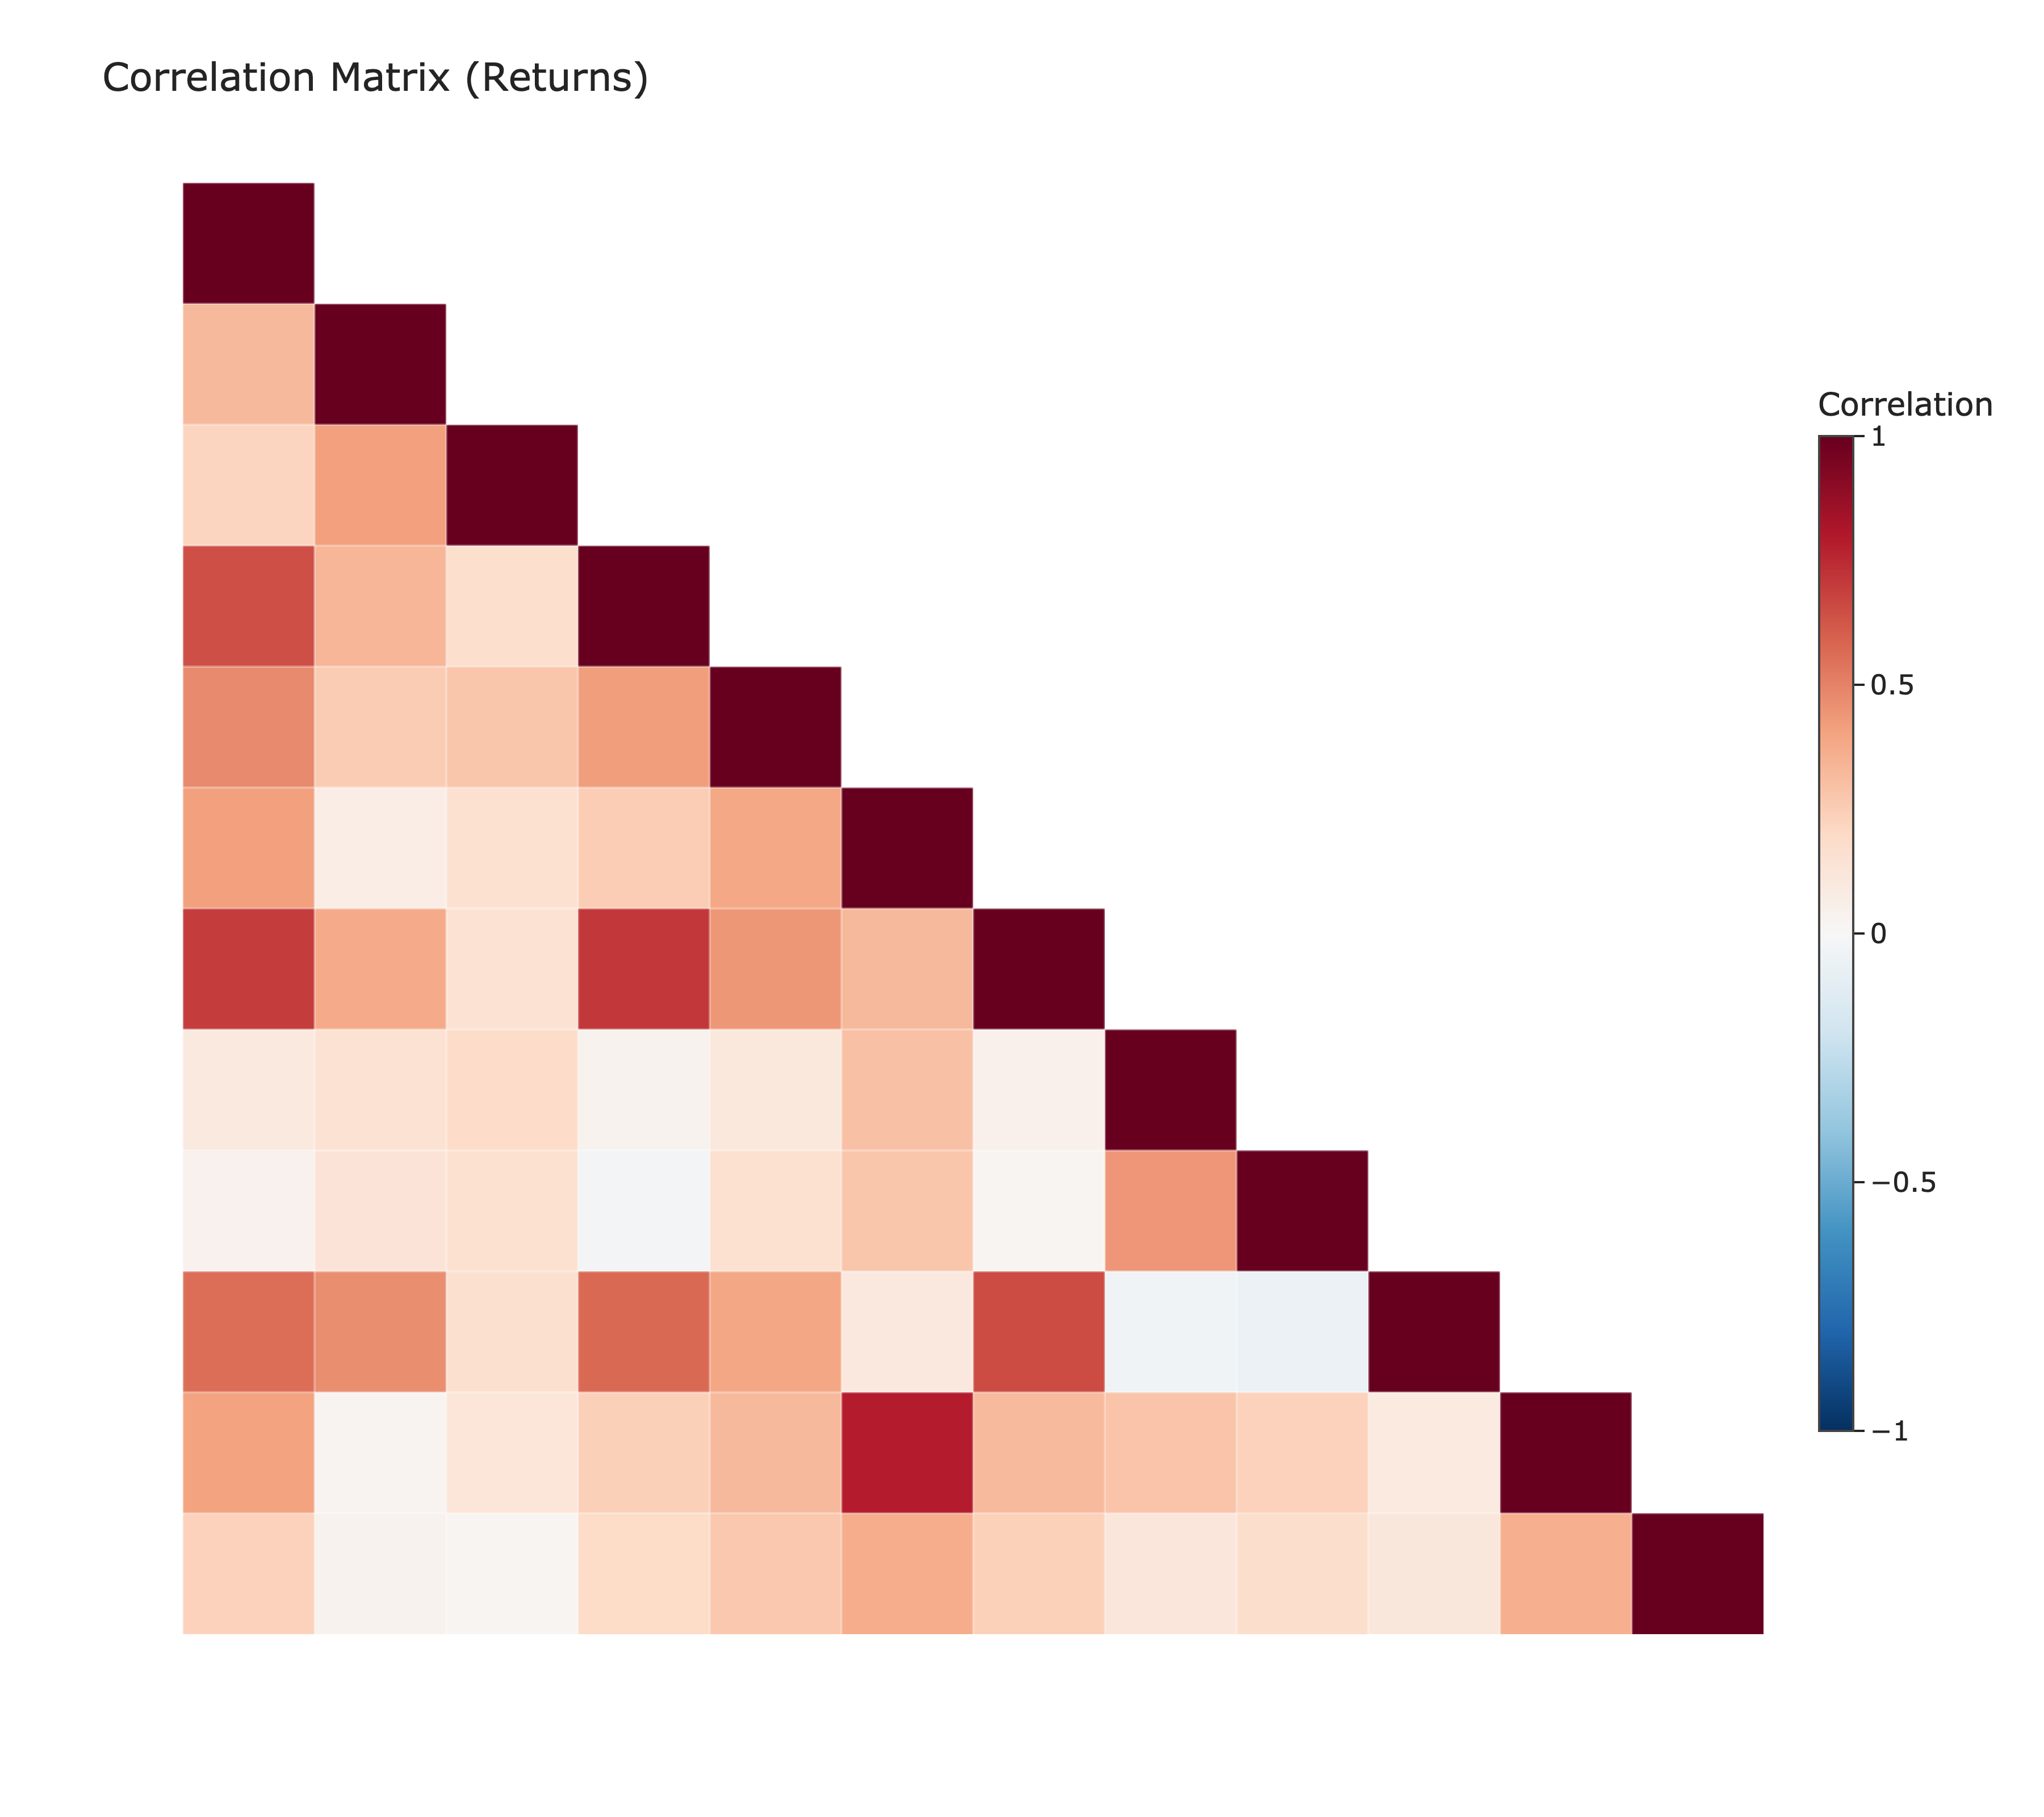

In [26]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.